In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt

C:\Users\olatu\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

# Split the data into features (X) and target (y)
X = data.drop(columns = "Class", axis=1)
y = data['Class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 2)


In [3]:
# Initialize the logistic regression model
lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)


C:\Users\olatu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
# Predict the probability of fraud for the test set
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve values
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate AUPRC
auprc = auc(recall, precision)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_pred_proba)

# Print the AUPRC and average precision score
print("AUPRC:", auprc)
print("Average Precision:", avg_precision)


AUPRC: 0.684763678858082
Average Precision: 0.6859933834316249


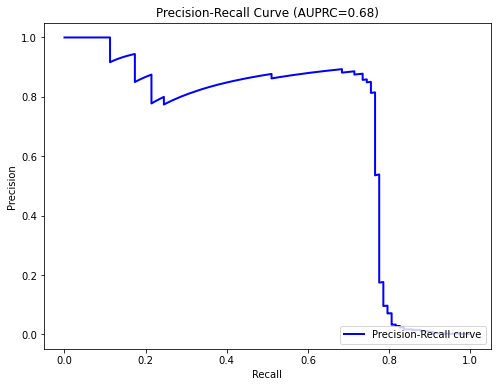

In [7]:
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUPRC={0:0.2f})'.format(auprc))
plt.legend(loc='lower right')
plt.show()
